## Summary
This data set is uploaded in order to get the insights of Credit card Defaultees based on the respective attributes. 
The consumer lending line of business @ JPMC is in the business of lending money to customers for loans, credit cards, mortgage, etc. and a model like this which can predict potential defaults would be immensely helpful in making lending decisions. The aim of the project is to provide this service, based on a ML model, which will be repeatable, scallable and retrainable.

## Data Set
Data set is from Kaggle : https://www.kaggle.com/mishra5001/credit-card
### Description from Kaggle:
#### Motive!

This data set is uploaded in order to get the insights of Credit card Defaultees based on the respective attributes!

#### Inside?

We have attributes such as IncomeTotal,AMTAPPLICATION,AMT_CREDIT and around 122 Columns in Application Data Set. The interesting thing is if you intend to see the patterns and variations, we can use the PREVIOUS APPLICATION data set also, in order to get more insights.!

#### Inspiration
We took this data set as our assignment and tried to perform the EDA to the best of our capability!

## Solution approach
This is a supervised classification problem since we are using existing features and target variable to first train the model on a subset of data and then evaluate the model's performance on the test data. We would pick the model that best meets the criteria of accuracy and performance. We are trying to predict if a loan request from a customer will default.


## Value to JP Morgan
The consumer lending line of business @ JPMC is in the business of lending money to customers for loans, credit cards, mortgage, etc. and a model like this which can predict potential defaults would be immensely helpful in making lending decisions, Also help JPMC to identify and train their customers for credit discipline.



## Aim of the project
Use the data to come up with a classification model, to approve or reject the application. Eventually build a scalable, repeatable service to give live classification decisions.

## Plan for deliverables
All code and analysis will be checkin in github:
https://github.com/amoghugupte/Slackers-Capstone


In [1]:
import pandas as pd # main focus of this Notebook!
import seaborn as sns
import matplotlib.pyplot as pyplot
sns.set()

# df is a common name for a dataframe
df = pd.read_csv('application_data.csv') # read into a pandas DataFrame (df)

# head() is a handy way to visualize what you've loaded. 
df.head() 

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [2]:
df.shape

(307511, 122)

In [3]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [4]:
df.columns.tolist() 

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [5]:
# create a new dataframe with a subset of columns

cols = ['TARGET','FLAG_OWN_CAR','FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
        'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_QRT']
#'SK_ID_PREV','AMT_APPLICATION', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE'  - No data

temp1 = df.loc[:,cols].copy() # all rows (:)

In [6]:
temp1.shape

(307511, 19)

In [7]:
temp1.describe().transpose()

count           mean            std  \
TARGET                       307511.0       0.080729       0.272419   
CNT_CHILDREN                 307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL             307511.0  168797.919297  237123.146279   
AMT_CREDIT                   307511.0  599025.999706  402490.776996   
DAYS_BIRTH                   307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                307511.0   63815.045904  141275.766519   
REGION_RATING_CLIENT         307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY  307511.0       2.031521       0.502737   
EXT_SOURCE_1                 134133.0       0.502130       0.211062   
EXT_SOURCE_2                 306851.0       0.514393       0.191060   
EXT_SOURCE_3                 246546.0       0.510853       0.194844   
AMT_REQ_CREDIT_BUREAU_QRT    265992.0       0.265474       0.794056   

                                      min            25%            50%  \
TARGET                       0.000000e+00       0.000000       0.000000   
CNT_CHILDREN                 0.000000e+00       0.000000       0.000000   
AMT_INCOME_TOTAL             2.565000e+04  112500.000000  147150.000000   
AMT_CREDIT                   4.500000e+04  270000.000000  513531.000000   
DAYS_BIRTH                  -2.522900e+04  -19682.000000  -15750.000000   
DAYS_EMPLOYED               -1.791200e+04   -2760.000000   -1213.000000   
REGION_RATING_CLIENT         1.000000e+00       2.000000       2.000000   
REGION_RATING_CLIENT_W_CITY  1.000000e+00       2.000000       2.000000   
EXT_SOURCE_1                 1.456813e-02       0.334007       0.505998   
EXT_SOURCE_2                 8.173617e-08       0.392457       0.565961   
EXT_SOURCE_3                 5.272652e-04       0.370650       0.535276   
AMT_REQ_CREDIT_BUREAU_QRT    0.000000e+00       0.000000       0.000000   

                                       75%           max  
TARGET                            0.000000  1.000000e+00  
CNT_CHILDREN                      1.000000  1.900000e+01  
AMT_INCOME_TOTAL             202500.000000  1.170000e+08  
AMT_CREDIT                   808650.000000  4.050000e+06  
DAYS_BIRTH                   -12413.000000 -7.489000e+03  
DAYS_EMPLOYED                  -289.000000  3.652430e+05  
REGION_RATING_CLIENT              2.000000  3.000000e+00  
REGION_RATING_CLIENT_W_CITY       2.000000  3.000000e+00  
EXT_SOURCE_1                      0.675053  9.626928e-01  
EXT_SOURCE_2                      0.663617  8.549997e-01  
EXT_SOURCE_3                      0.669057  8.960095e-01  
AMT_REQ_CREDIT_BUREAU_QRT         0.000000  2.610000e+02

1. Some data for EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, AMT_REQ_CREDIT_BUREAU_QRT missing, we may have to delete these rows and see if we can create the model, worst case we may have to remove these columns and check if the model can be generated.
1. Mean income is 168,798. Max income is 117,000,000
1. Mean credit is 599,026. Max credit is 4,050,000
1. Mean age is 44 years, Min age is 21 years, Max age is 69 years
1. Mean employment tenure is skewed because of few outliers, which we will filter to get a better model.
1. AMT_REQ_CREDIT_BUREAU_QRT - Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before
application)
1. FLAG_OWN_CAR, FLAG_OWN_REALTY valid values are Y and N
1. NAME_INCOME_TYPE valid values are - Bussinessman, Commercial associate, Maternity leave, Pensioner, State servant, Student, unemployed, Working
1. NAME_EDUCATION_TYPE valid values  are - Academic degree, Higher education, Incomplete higher, Lower secondary, Secondary/secondary special
1. NAME_HOUSING_TYPE valid values are - Co-op apartment, House / apartment, Municipal apartment, Office apartment, Rented apartment, With parents
1. REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY  valid values are - 1, 2, 3


In [8]:
temp1.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [9]:
temp1.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


<AxesSubplot:>

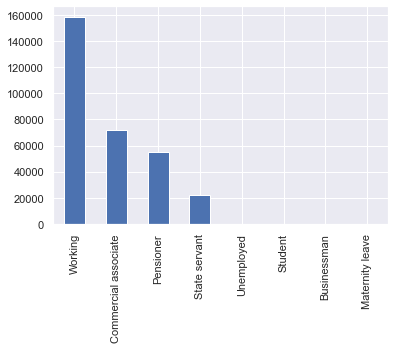

In [10]:
income_type_counts = temp1.NAME_INCOME_TYPE.value_counts()

#income_type_counts.plot(kind='bar')

print (income_type_counts)
income_type_counts.plot(kind='bar')


Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


[Text(0.5, 1.0, 'Education Type')]

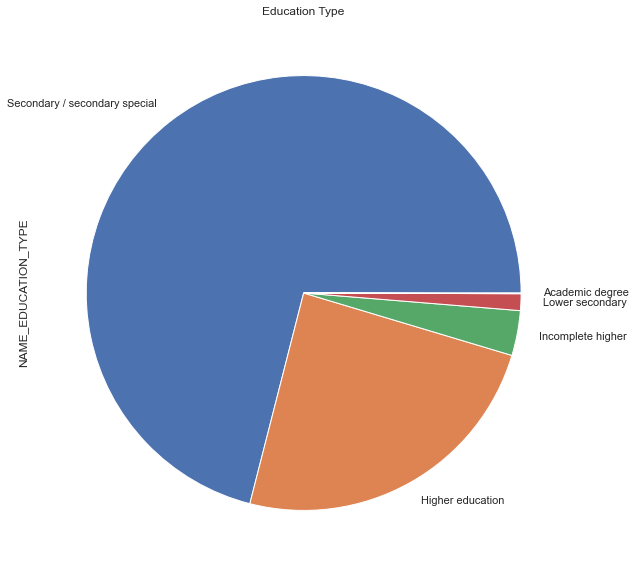

In [11]:
education_type_counts = temp1.NAME_EDUCATION_TYPE.value_counts()
sns.set(rc={'figure.figsize':(15,10)})
print (education_type_counts)

education_type_counts.plot(kind='pie').set(title='Education Type')


House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


<AxesSubplot:ylabel='NAME_HOUSING_TYPE'>

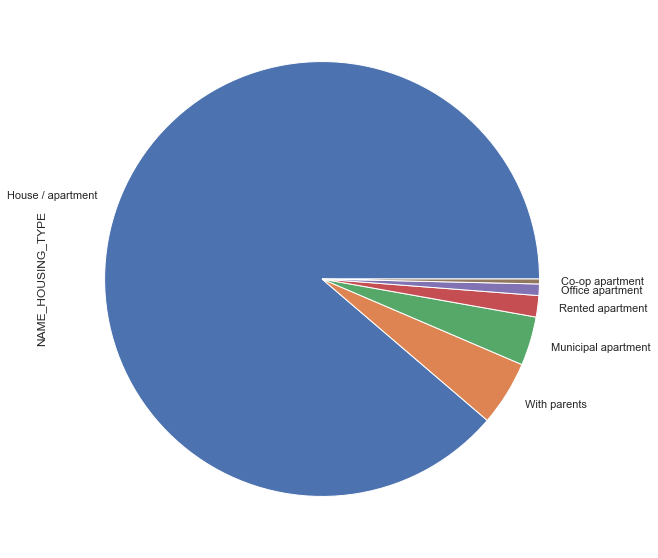

In [12]:
housing_type_count = temp1.NAME_HOUSING_TYPE.value_counts()

print (housing_type_count)
housing_type_count.plot(kind='pie')

In [13]:
temp1.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [14]:
temp1.REGION_RATING_CLIENT.value_counts()

2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64

In [15]:
temp1.REGION_RATING_CLIENT_W_CITY.value_counts()

2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

In [16]:
temp1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

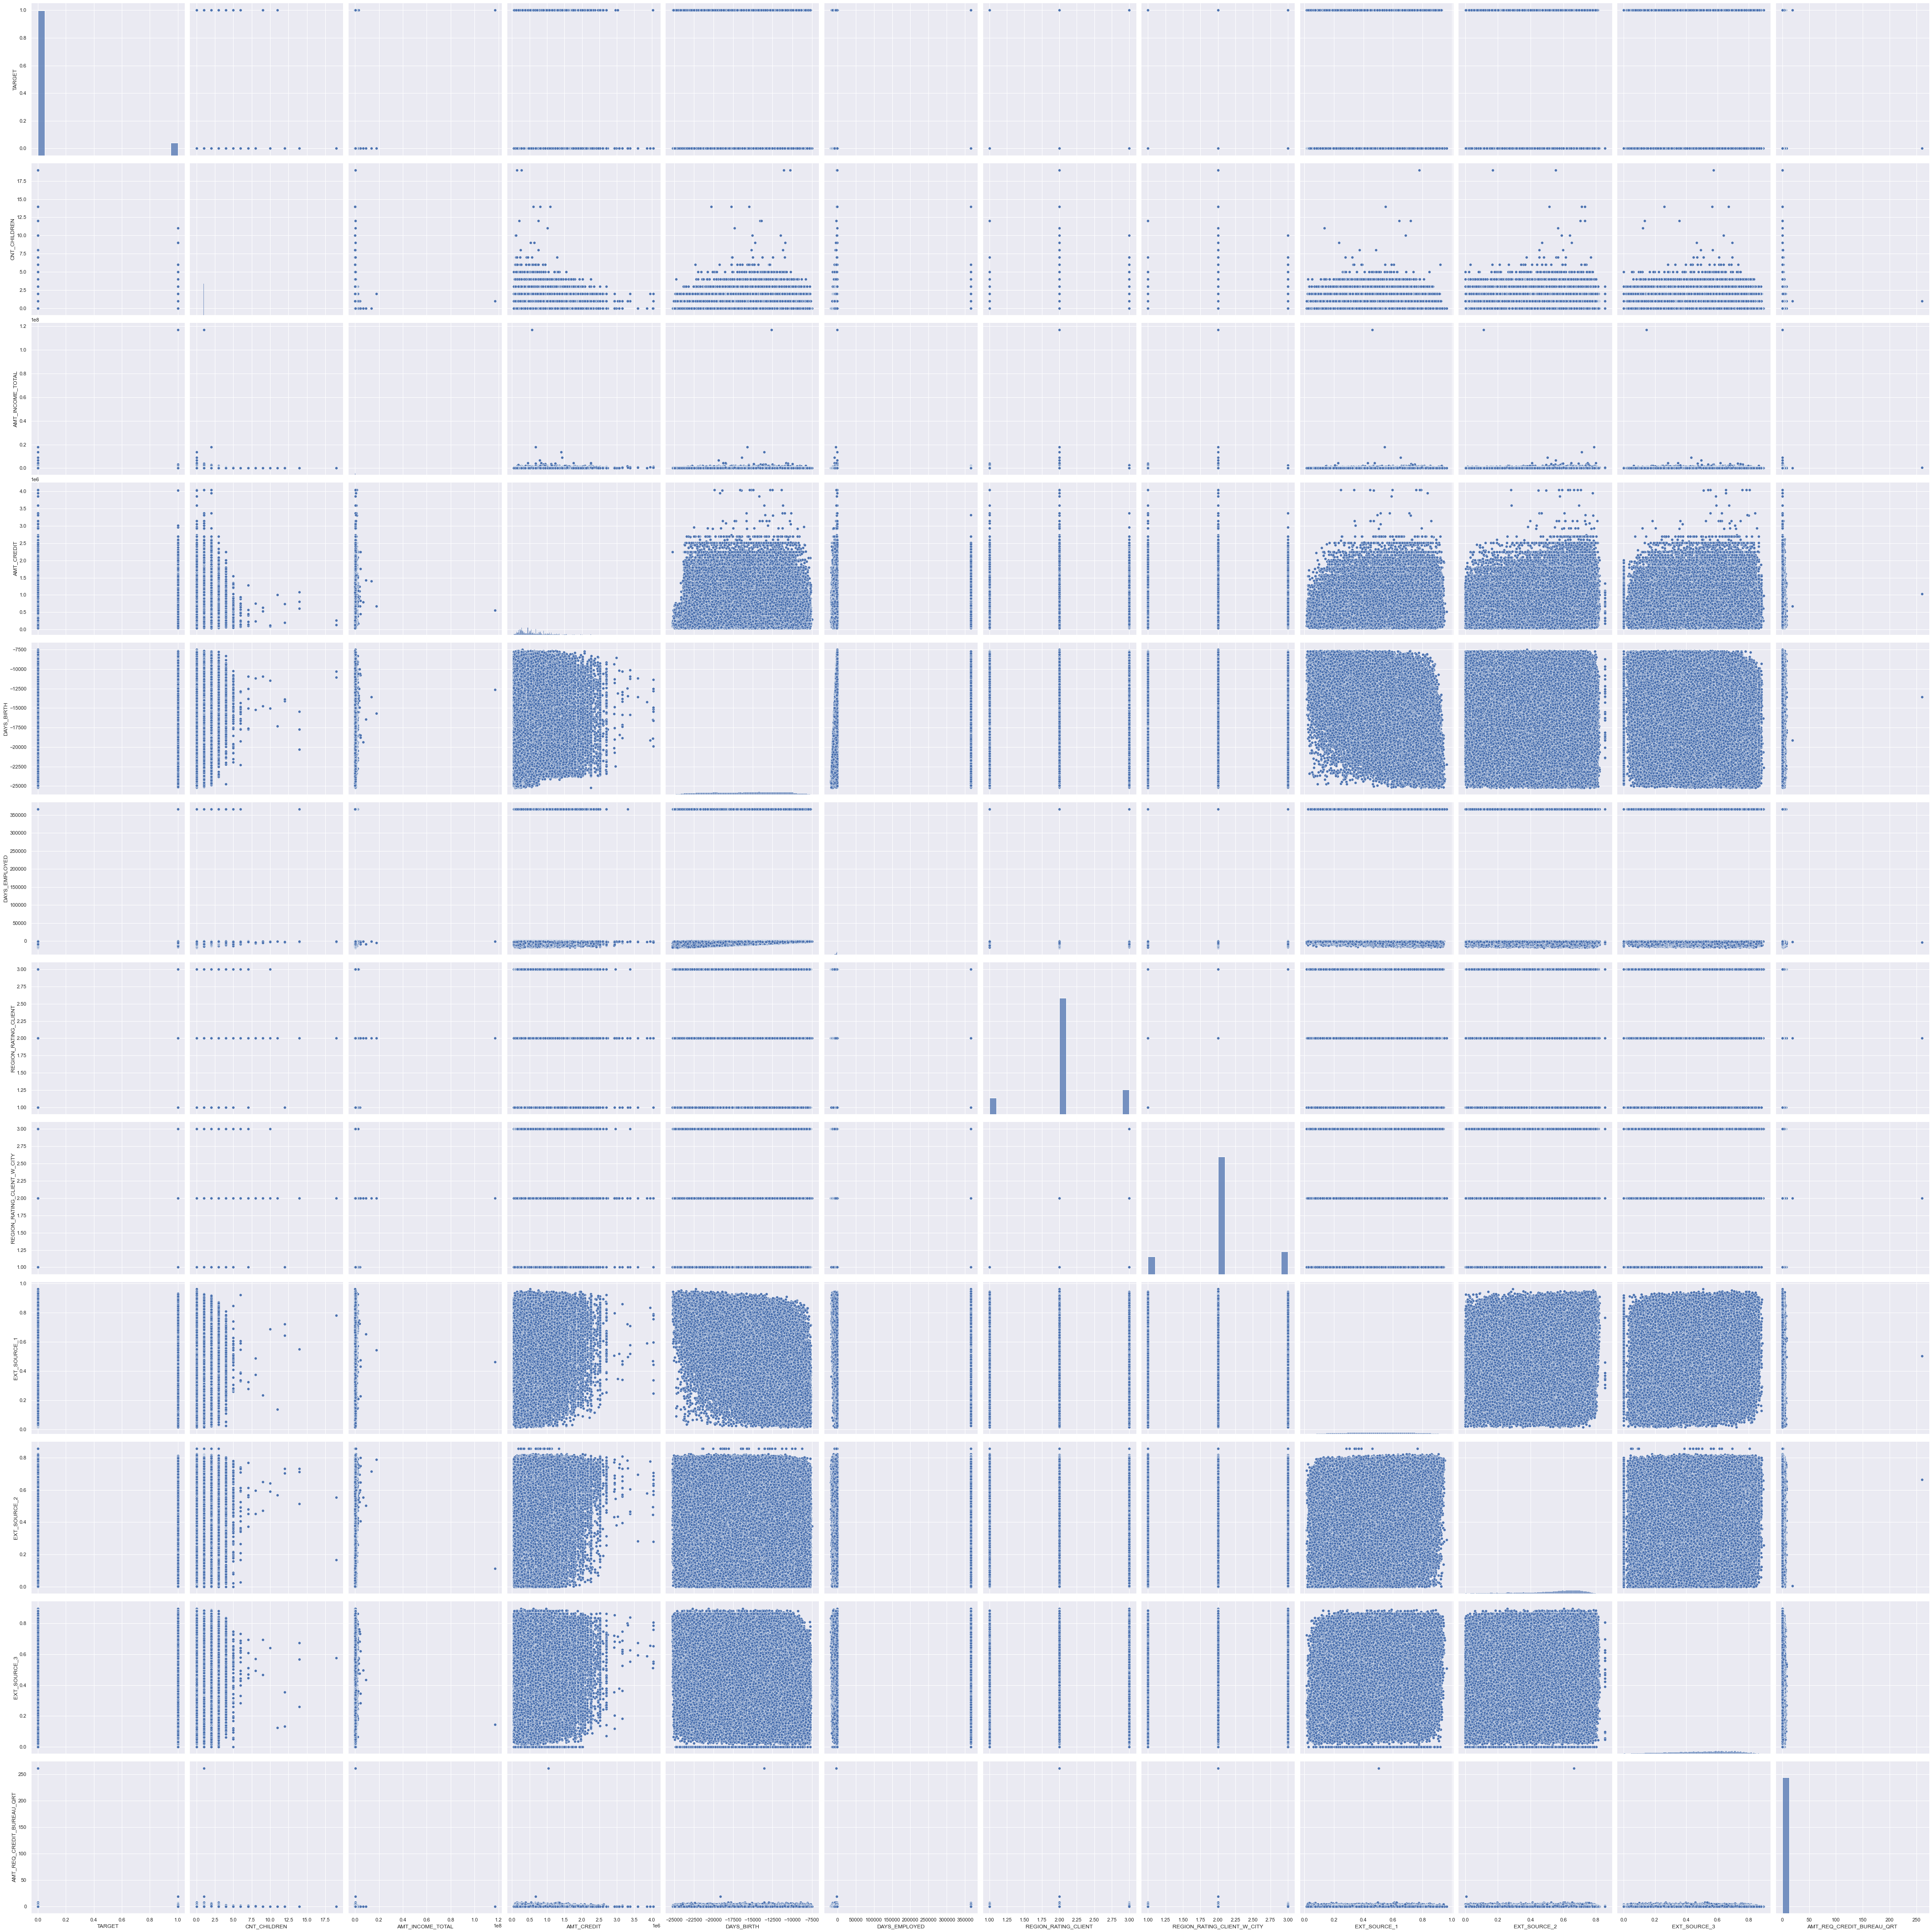

In [17]:
sns.pairplot(temp1, height=5);

<AxesSubplot:xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

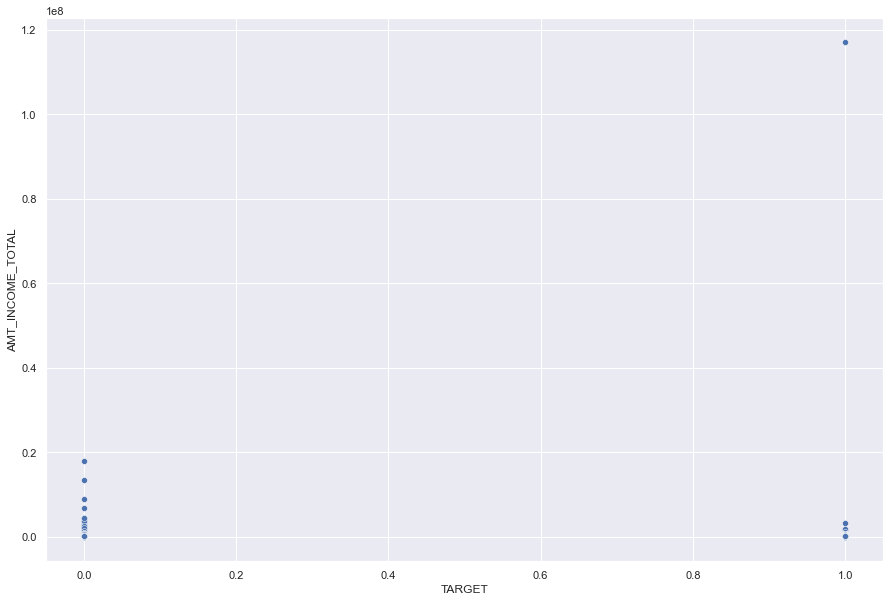

In [18]:
sns.scatterplot(y="AMT_INCOME_TOTAL", x="TARGET", data=temp1)